# UNEMPLOYMENT ANALYSIS WITH PYTHON
Unemployment is measured by the unemployment rate which is the number of people who are unemployed 
as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19,
so analyzing the unemployment rate can be a good data science project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Unemployment in India.csv')
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df.dtypes

Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [5]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [6]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [8]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [9]:
# Strip any leading/trailing whitespace from column names
df.columns = df.columns.str.strip()


In [10]:
# Rename columns for easier access (if necessary)
df.rename(columns={
    'Region':'State',
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Rate'
}, inplace=True)

In [11]:
df.head()

,State,Date,Frequency,Unemployment_Rate,Employed,Labour_Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


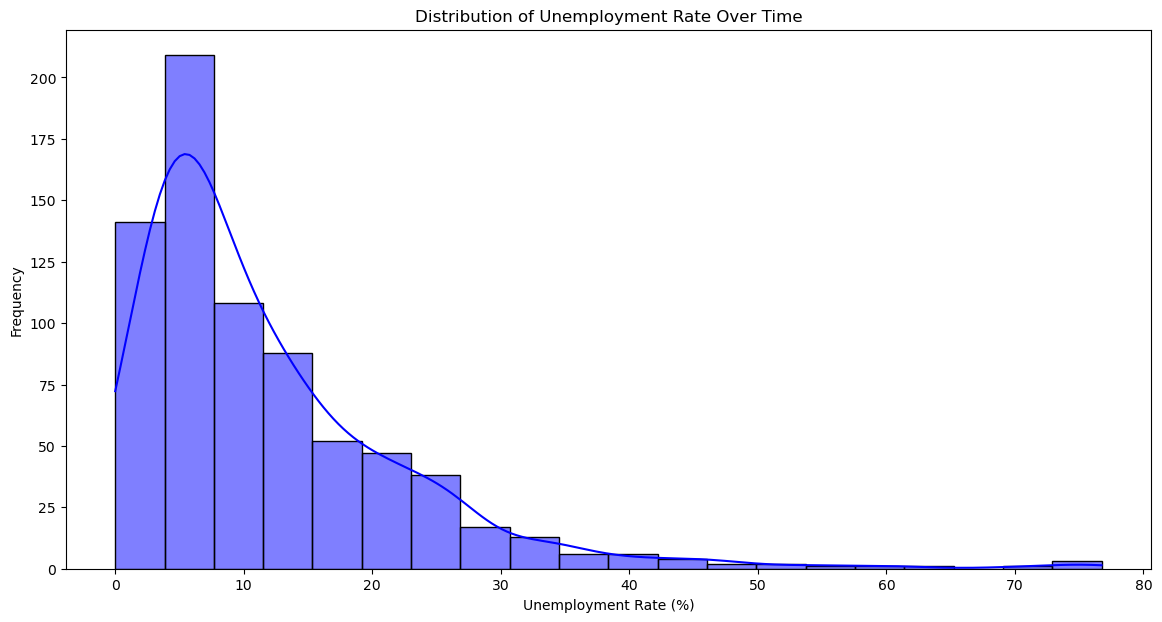

In [12]:
if 'Unemployment_Rate' not in df.columns:
    print("\nError: 'Unemployment_Rate' column not found in the dataset.")
    print("Available columns are:", df.columns)
else:
    plt.figure(figsize=(14, 7))
    sns.histplot(df['Unemployment_Rate'], bins=20, color='b', kde=True)
    plt.title('Distribution of Unemployment Rate Over Time')
    plt.xlabel('Unemployment Rate (%)')
    plt.ylabel('Frequency')
    plt.show()


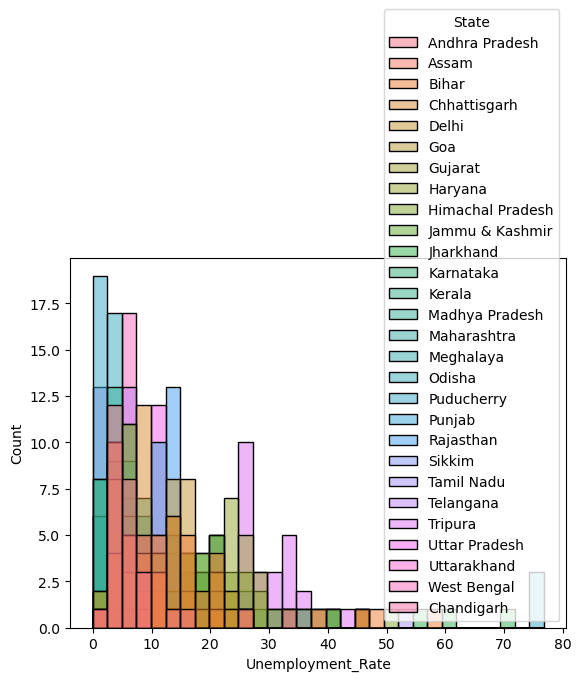

In [13]:
sns.histplot(x="Unemployment_Rate", hue="State",data=df)
plt.show()

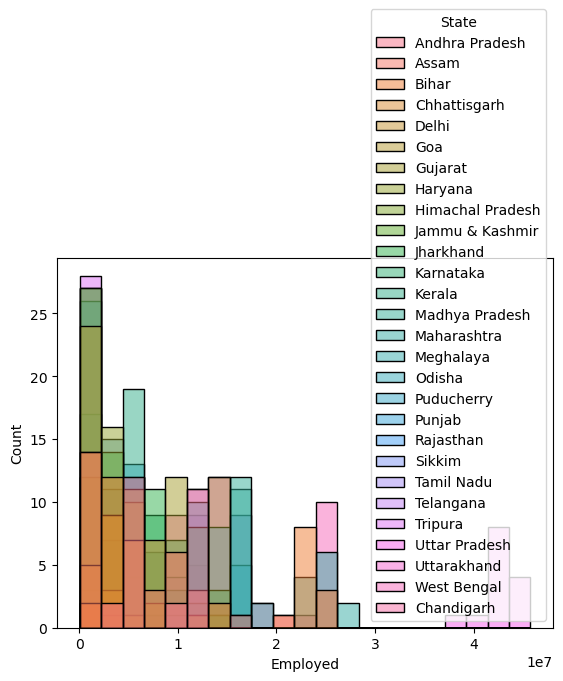

In [14]:
sns.histplot(x="Employed", hue="State",data=df)
plt.show()


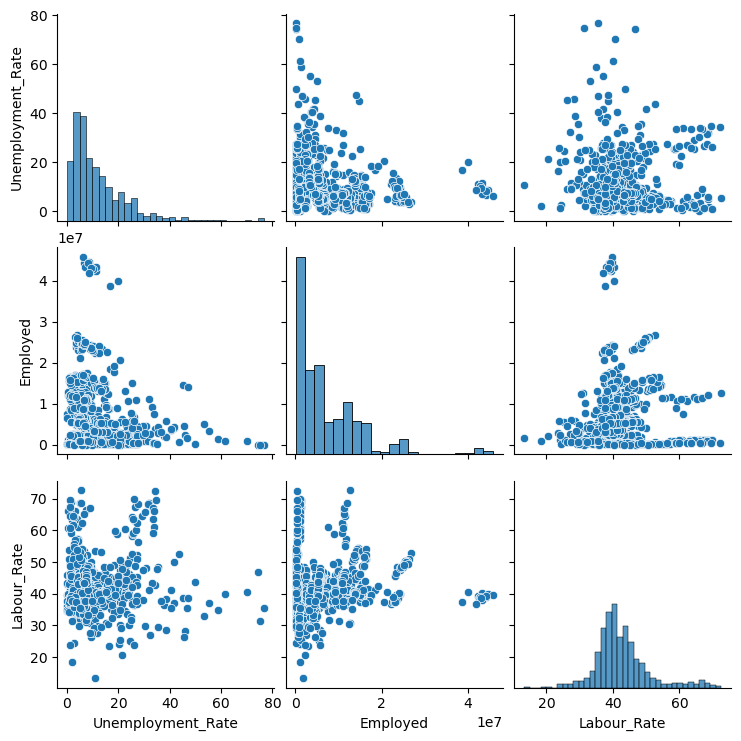

In [15]:
sns.pairplot(df)

In [16]:
# Descriptive statistics of the Employed
df['Employed'].describe()


count    7.400000e+02
mean     7.204460e+06
std      8.087988e+06
min      4.942000e+04
25%      1.190404e+06
50%      4.744178e+06
75%      1.127549e+07
max      4.577751e+07
Name: Employed, dtype: float64

In [17]:
# Descriptive statistics of the unemployment rate
df['Unemployment_Rate'].describe()

count    740.000000
mean      11.787946
std       10.721298
min        0.000000
25%        4.657500
50%        8.350000
75%       15.887500
max       76.740000
Name: Unemployment_Rate, dtype: float64

In [18]:
# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Set the Date column as the index
df.set_index('Date', inplace=True)


In [19]:
# Analyzing the impact of COVID-19 on unemployment
# Assuming COVID-19 impact started around March 2020
pre_covid = df['Unemployment_Rate']['2019-01-01':'2020-02-29']
post_covid = df['Unemployment_Rate']['2020-03-01':]



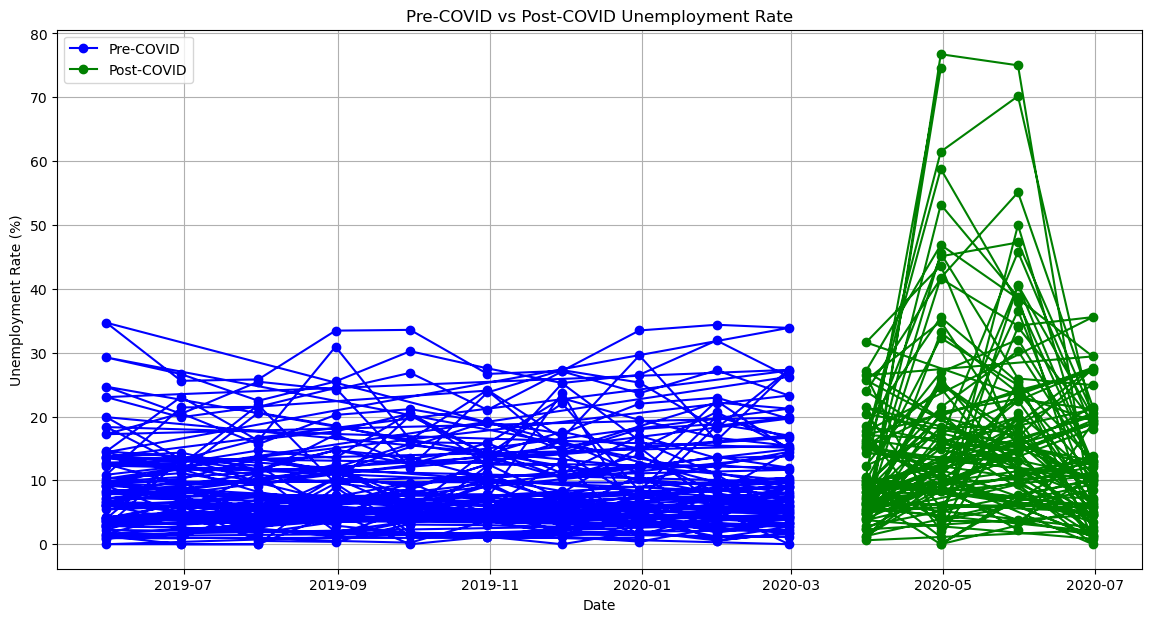

In [20]:
# Plotting pre-COVID vs post-COVID unemployment rates
plt.figure(figsize=(14, 7))
plt.plot(pre_covid.index, pre_covid, label='Pre-COVID', marker='o', linestyle='-', color='b')
plt.plot(post_covid.index, post_covid, label='Post-COVID', marker='o', linestyle='-', color='g')
plt.title('Pre-COVID vs Post-COVID Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Descriptive statistics pre-COVID
pre_covid.describe()
    

count    536.000000
mean       9.509534
std        7.358863
min        0.000000
25%        4.287500
50%        7.115000
75%       12.840000
max       34.690000
Name: Unemployment_Rate, dtype: float64

In [22]:
# Descriptive statistics post-COVID
post_covid.describe()

count    204.000000
mean      17.774363
std       15.033663
min        0.000000
25%        6.857500
50%       14.520000
75%       23.965000
max       76.740000
Name: Unemployment_Rate, dtype: float64

In [23]:
# Correlation analysis (if there are other columns like GDP, Inflation, etc.)
if 'Employed' in df.columns and 'Labour_Rate' in df.columns:
    correlation_matrix = df[['Unemployment_Rate', 'Employed', 'Labour_Rate']].corr()
    correlation_matrix

    


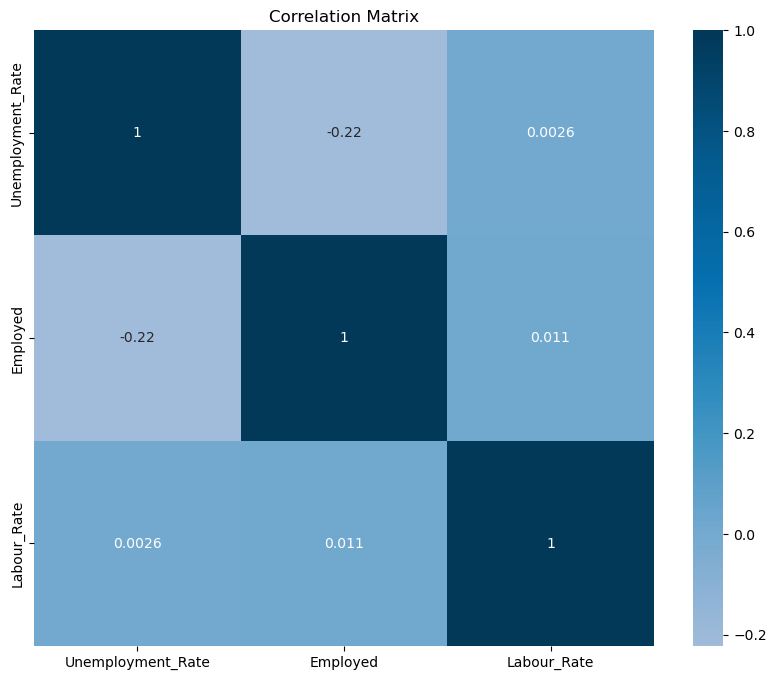

In [24]:
# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PuBu', center=0)
plt.title('Correlation Matrix')
plt.show()

In [25]:
df.describe()

,Unemployment_Rate,Employed,Labour_Rate
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [26]:
x = df[['Unemployment_Rate', 'Employed', 'Labour_Rate']]
y = df['Employed']


In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=40)

In [28]:
x_train

,Unemployment_Rate,Employed,Labour_Rate
Date,,,
2019-08-31,1.40,10743959.0,59.23
2019-09-30,20.46,2992082.0,39.25
2019-11-30,4.66,9625362.0,46.64
2020-06-30,4.94,21225887.0,40.44
2019-12-31,12.37,13857200.0,40.21
...,...,...,...
2020-05-31,55.10,3315038.0,37.03
2020-01-31,16.21,5062293.0,43.74
2020-03-31,9.47,15059769.0,39.47


In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [30]:

# Drop rows with missing values
x_train_dropna = x_train.dropna()
y_train_dropna = y_train.dropna()

# Now train your model with the data without missing values
model.fit(x_train_dropna, y_train_dropna)


LinearRegression()

In [31]:
# Drop missing values from the test data
x_test_dropna = x_test.dropna()
y_test_dropna = y_test.dropna()
# Now make predictions on the test data without missing values
pred = model.predict(x_test_dropna)


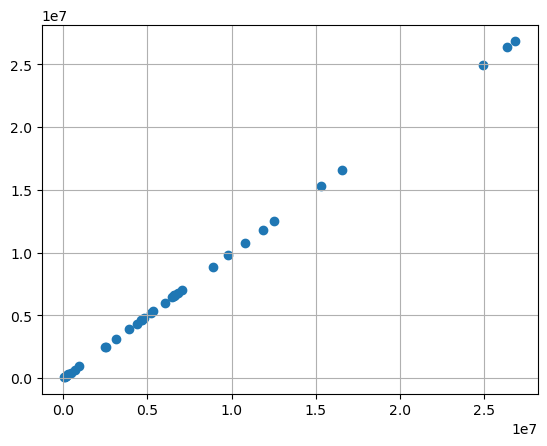

In [32]:
plt.scatter(y_test_dropna, pred)
plt.grid(True)
plt.show()